### Problem Statement:
Utilize various probability distributions to analyze customer behaviors and store performance metrics using a custom dataset.
Dataset Name: Retail_Store_Data.csvccurred

#### Steps to Perform:

**1. Data Preparation:**
  * Import necessary Python libraries (for example, Pandas, NumPy, Matplotlib, SciPy)
  * Load the "Retail_Store_Data.csv" dataset
  * Perform basic data exploration (for example, view the first few rows, check for null values)

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, poisson,norm,uniform


Retail_Data=pd.read_csv('Retail_Store_Data.csv')
df=pd.DataFrame(Retail_Data)
df

,Customer_ID,Purchase_Amount,Visit_Duration,Items_Purchased,Store_Section,Weekday
0,1,174.835708,28.423084,2,Groceries,Tuesday
1,2,143.086785,21.502462,7,Electronics,Sunday
2,3,182.384427,80.007327,5,Apparel,Saturday
3,4,226.151493,87.712330,5,Groceries,Saturday
4,5,138.292331,13.474476,8,Groceries,Tuesday
...,...,...,...,...,...,...
995,996,135.944985,40.875154,5,Electronics,Saturday
996,997,239.884326,32.769184,2,Electronics,Thursday
997,998,182.042143,66.822989,2,Apparel,Wednesday
998,999,121.441051,10.605638,5,Apparel,Saturday


In [12]:
df.head()

,Customer_ID,Purchase_Amount,Visit_Duration,Items_Purchased,Store_Section,Weekday
0,1,174.835708,28.423084,2,Groceries,Tuesday
1,2,143.086785,21.502462,7,Electronics,Sunday
2,3,182.384427,80.007327,5,Apparel,Saturday
3,4,226.151493,87.712330,5,Groceries,Saturday
4,5,138.292331,13.474476,8,Groceries,Tuesday


In [11]:
df.isnull()

,Customer_ID,Purchase_Amount,Visit_Duration,Items_Purchased,Store_Section,Weekday
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


In [17]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [16]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Customer_ID          int64
Purchase_Amount    float64
Visit_Duration     float64
Items_Purchased      int64
Store_Section       object
Weekday             object
dtype: object

In [8]:
df['Purchase_Amount'].dtype

dtype('float64')

In [18]:
df['Items_Purchased'].mean()

4.929

**2. Bernoulli Distribution:**
  * Create a binary variable representing whether a customer spent more than 30 minutes in the store (1 for Yes, 0 for No).
  * Analyze this variable using Bernoulli distribution

Estimated Probability (p): 0.81


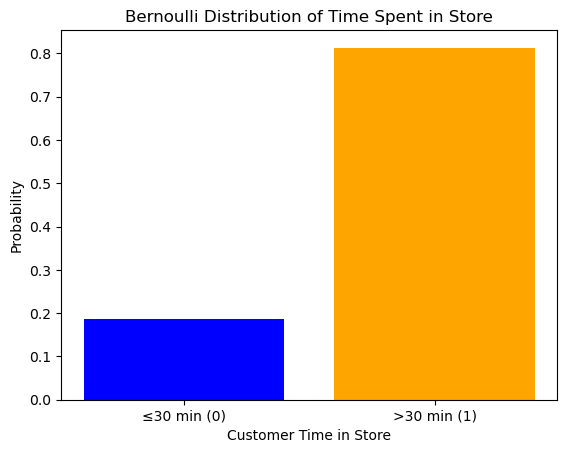

In [29]:
# Create binary variable (1 if time spent > 30 mins, else 0)
df['Spent_30min'] = np.where(df['Visit_Duration'] > 30, 1, 0)

# Compute probability (p) of spending more than 30 minutes
p_hat = df['Spent_30min'].mean()  # Mean of binary variable gives probability
print(f"Estimated Probability (p): {p_hat:.2f}")

# Define Bernoulli distribution with estimated probability
bernoulli_dist = bernoulli(p_hat)

# Define possible outcomes (0 or 1)
x = [0, 1]
y = bernoulli_dist.pmf(x)

# Plot PMF
plt.bar(x, y, tick_label=["≤30 min (0)", ">30 min (1)"], color=['blue', 'orange'])
plt.ylabel("Probability")
plt.xlabel("Customer Time in Store")
plt.title("Bernoulli Distribution of Time Spent in Store")
plt.show()

**3 Binomial Distribution:**
  * Consider 10 random visits; analyze the number of visits where customers spent over $100 using the binomial distribution

Estimated Probability (p): 0.85
P(X=0) = 0.0000
P(X=1) = 0.0000
P(X=2) = 0.0000
P(X=3) = 0.0001
P(X=4) = 0.0011
P(X=5) = 0.0078
P(X=6) = 0.0378
P(X=7) = 0.1252
P(X=8) = 0.2725
P(X=9) = 0.3514
P(X=10) = 0.2039


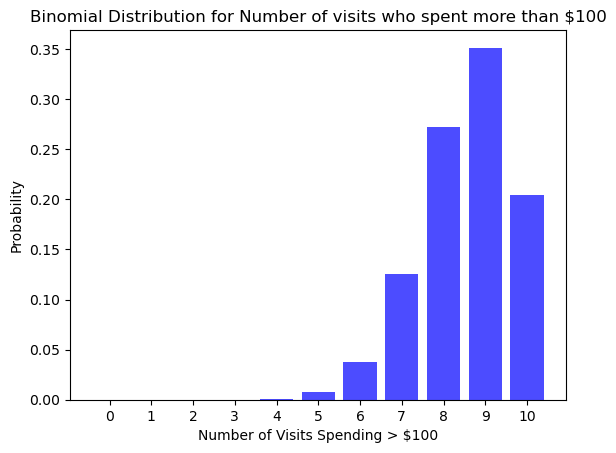

In [36]:
n=10
df['Spent_100']=np.where(df['Purchase_Amount']>100,1,0)
# Compute probability (p) of spending over $100
p_hat = df['Spent_100'].mean()
print(f"Estimated Probability (p): {p_hat:.2f}")

# Define parameters
n = 10  # Number of visits
p = p_hat  # Probability of spending > $100

# Binomial distribution
binomial_dist = binom(n, p)

# Compute probabilities for each possible outcome (0 to 10)
x_values = np.arange(0, n + 1)
y_values = binomial_dist.pmf(x_values)

# Display probabilities
for i, prob in zip(x_values, y_values):
    print(f"P(X={i}) = {prob:.4f}")

# Plot Binomial PMF
plt.bar(x_values, y_values, color='blue', alpha=0.7)
plt.xlabel("Number of Visits Spending > $100")
plt.ylabel("Probability")
plt.title("Binomial Distribution for Number of visits who spent more than $100")
plt.xticks(range(n + 1))
plt.show()

**4. Poisson Distribution:**
  * Analyze the number of customers visiting the store per hour. Assume the store's data indicates an average of 15 customers per hour

P(X=0) = 0.0000
P(X=1) = 0.0000
P(X=2) = 0.0000
P(X=3) = 0.0002
P(X=4) = 0.0006
P(X=5) = 0.0019
P(X=6) = 0.0048
P(X=7) = 0.0104
P(X=8) = 0.0194
P(X=9) = 0.0324
P(X=10) = 0.0486
P(X=11) = 0.0663
P(X=12) = 0.0829
P(X=13) = 0.0956
P(X=14) = 0.1024
P(X=15) = 0.1024
P(X=16) = 0.0960
P(X=17) = 0.0847
P(X=18) = 0.0706
P(X=19) = 0.0557
P(X=20) = 0.0418
P(X=21) = 0.0299
P(X=22) = 0.0204
P(X=23) = 0.0133
P(X=24) = 0.0083
P(X=25) = 0.0050
P(X=26) = 0.0029
P(X=27) = 0.0016
P(X=28) = 0.0009
P(X=29) = 0.0004
P(X=30) = 0.0002


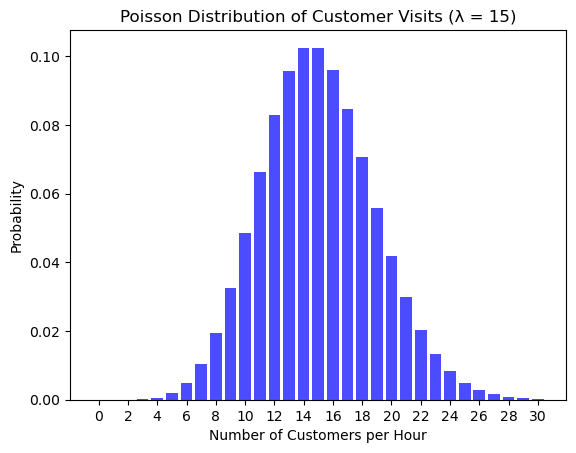

In [39]:
# Parameter for Poisson distribution
lambda_ = 15  # Mean number of events
x_values=np.arange(0,31)

# Compute Poisson probabilities
y_values = poisson.pmf(x_values, lambda_)

# Display probabilities
for k, prob in zip(x_values, y_values):
    print(f"P(X={k}) = {prob:.4f}")

# Plot Poisson PMF
plt.bar(x_values, y_values, color='blue', alpha=0.7)
plt.xlabel("Number of Customers per Hour")
plt.ylabel("Probability")
plt.title("Poisson Distribution of Customer Visits (λ = 15)")
plt.xticks(range(0, 31, 2))  # Show every 2nd value for readability
plt.show()

**5. Normal Distribution:**
  * Examine the Purchase_Amount variable. Check if it follows a normal distribution. Calculate its mean and standard deviation.

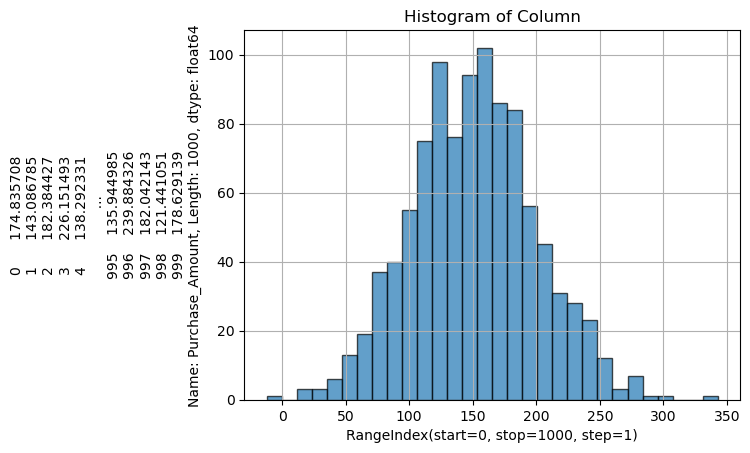

In [49]:
import matplotlib.pyplot as plt

# Assume 'column_name' is the column to check
df['Purchase_Amount'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.xlabel(df.index)
plt.ylabel(df['Purchase_Amount'])
plt.title('Histogram of Column')
plt.show()

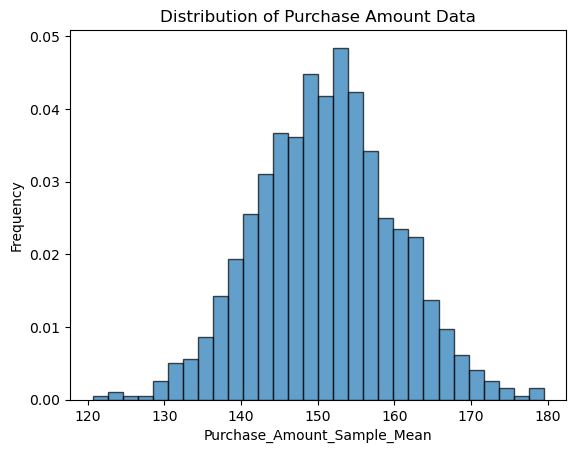

In [54]:
# Define sample size and number of samples
sample_size = 30  # Large enough for CLT
num_samples = 1000  # More samples = better approximation

# Generate sample means
sample_means = [df['Purchase_Amount'].sample(sample_size, replace=True).mean() for _ in range(num_samples)]

# Plot histogram of sample means
plt.hist(sample_means, bins=30, edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Purchase_Amount_Sample_Mean")
plt.ylabel("Frequency")
plt.title("Distribution of Purchase Amount Data")
plt.show()

In [50]:
df['Purchase_Amount'].skew()

0.11697636882001321

**Since 0.117 is close to 0, your data is: ✅ Nearly symmetric (no major skew).**

In [55]:
df['Purchase_Amount'].kurt()

0.07256220235414812

**Platykurtic (Flat Tails, Less Extreme Outliers) → Kurtosis < 3**|

In [53]:
df['Purchase_Amount'].max()

342.63657453273606

In [41]:
df['Purchase_Amount'].std()

48.96079690898381

In [42]:
df.value_counts()

Customer_ID  Purchase_Amount  Visit_Duration  Items_Purchased  Store_Section  Weekday   Spent_30min  Spent_100
1            174.835708       28.423084       2                Groceries      Tuesday   0            1            1
672          46.330488        49.845899       7                Groceries      Monday    1            0            1
659          159.904238       119.818226      4                Groceries      Friday    1            1            1
660          142.781979       112.642466      7                Apparel        Sunday    1            1            1
661          121.316900       80.682172       8                Apparel        Saturday  1            1            1
                                                                                                                 ..
339          170.646573       111.989560      6                Electronics    Monday    1            1            1
340          121.813772       35.810629       4                Groceries     

**6.Uniform Distribution:**
  * Analyze the Visit_Duration variable under the assumption that all time intervals are equally likely within the store’s opening hours

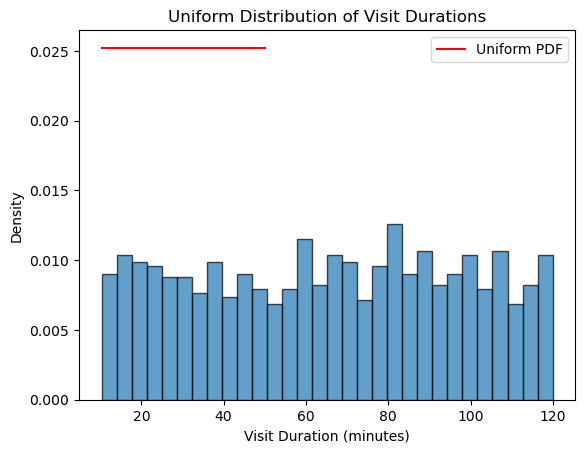

In [64]:
# Define min and max visit duration
a, b = df['Visit_Duration'].min(), 50
# Plot histogram
plt.hist(df['Visit_Duration'], bins=30, edgecolor='black', alpha=0.7, density=True)
# Plot theoretical PDF
x = np.linspace(a, b, 100)
plt.plot(x, uniform.pdf(x, a, b-a), 'r-', label='Uniform PDF')

plt.xlabel("Visit Duration (minutes)")
plt.ylabel("Density")
plt.title("Uniform Distribution of Visit Durations")
plt.legend()
plt.show()